In [ ]:
import pandas as pd
from io import StringIO
import numpy as np
import datetime as dt
import csv
import matplotlib.pyplot as plt
import matplotlib.finance
% matplotlib inline
plt.style.use('ggplot')

In [ ]:
stock_symbol=input('Stock Symbol:').upper()
#Location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\individual_stocks_5yr\{}_data.csv'.format(stock_symbol)
Location=r'C:\Users\dbowman\Desktop\Python Training\Data Sets\{}.csv'.format(stock_symbol)

print(Location)
my_data=pd.read_csv(Location,parse_dates=True,index_col='Date')

In [ ]:
my_data.tail()

In [ ]:
my_data.dtypes

In [88]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2014-07-01 to 2016-12-30
Data columns (total 6 columns):
Open         632 non-null float64
High         632 non-null float64
Low          632 non-null float64
Close        632 non-null float64
Adj Close    632 non-null float64
Volume       632 non-null int64
dtypes: float64(5), int64(1)
memory usage: 34.6 KB


In [89]:


my_data['10ma']=my_data['Close'].rolling(window=10).mean()
my_data.dropna(inplace=True)
my_data['20ma']=my_data['Close'].rolling(window=20).mean()
my_data['+2sigma']=my_data['20ma']+((my_data['Close'].rolling(window=20).std())*2)
my_data['-2sigma']=my_data['20ma']-((my_data['Close'].rolling(window=20).std())*2)
my_data['Vol_mavg']=my_data['Volume'].rolling(window=20).mean()
my_data['Daily_Return']=((my_data.Close-my_data.Close.shift(1))/my_data.Close.shift(1))*100
my_data['Daily_Return_ma']=my_data['Daily_Return'].rolling(window=10).mean()
my_data.dropna(inplace=True)

#my_data['10ma']=my_data['Adj Close'].rolling(window=10).mean()
#my_data.dropna(inplace=True)
#my_data['20ma']=my_data['Adj Close'].rolling(window=20).mean()
#my_data['+2sigma']=my_data['20ma']+((my_data['Adj Close'].rolling(window=20).std())*2)
#my_data['-2sigma']=my_data['20ma']-((my_data['Adj Close'].rolling(window=20).std())*2)
#my_data.dropna(inplace=True)

In [90]:
my_data.head()

,Open,High,Low,Close,Adj Close,Volume,10ma,20ma,+2sigma,-2sigma,Vol_mavg,Daily_Return,Daily_Return_ma
Date,,,,,,,,,,,,,
2014-08-11,55.910000,56.400002,55.480000,56.230000,56.230000,1709700,55.580000,55.1470,57.775621,52.518379,2290445.0,1.060390,-0.129237
2014-08-12,56.090000,56.419998,56.080002,56.389999,56.389999,1464500,55.512000,55.3215,57.779906,52.863094,2161990.0,0.284544,-0.106042
2014-08-13,56.459999,56.820000,56.200001,56.279999,56.279999,1591600,55.457000,55.4550,57.809879,53.100121,2090730.0,-0.195070,-0.083495
2014-08-14,56.299999,56.540001,55.450001,55.799999,55.799999,1897600,55.516999,55.5860,57.685679,53.486321,2077315.0,-0.852878,0.118037
2014-08-15,56.189999,56.189999,54.970001,55.490002,55.490002,2016900,55.622000,55.6850,57.545645,53.824354,2087920.0,-0.555550,0.200164


In [91]:
y1=2014;y2=2016
a=my_data[dt.datetime(y1,1,1):dt.datetime(y2,12,31)]


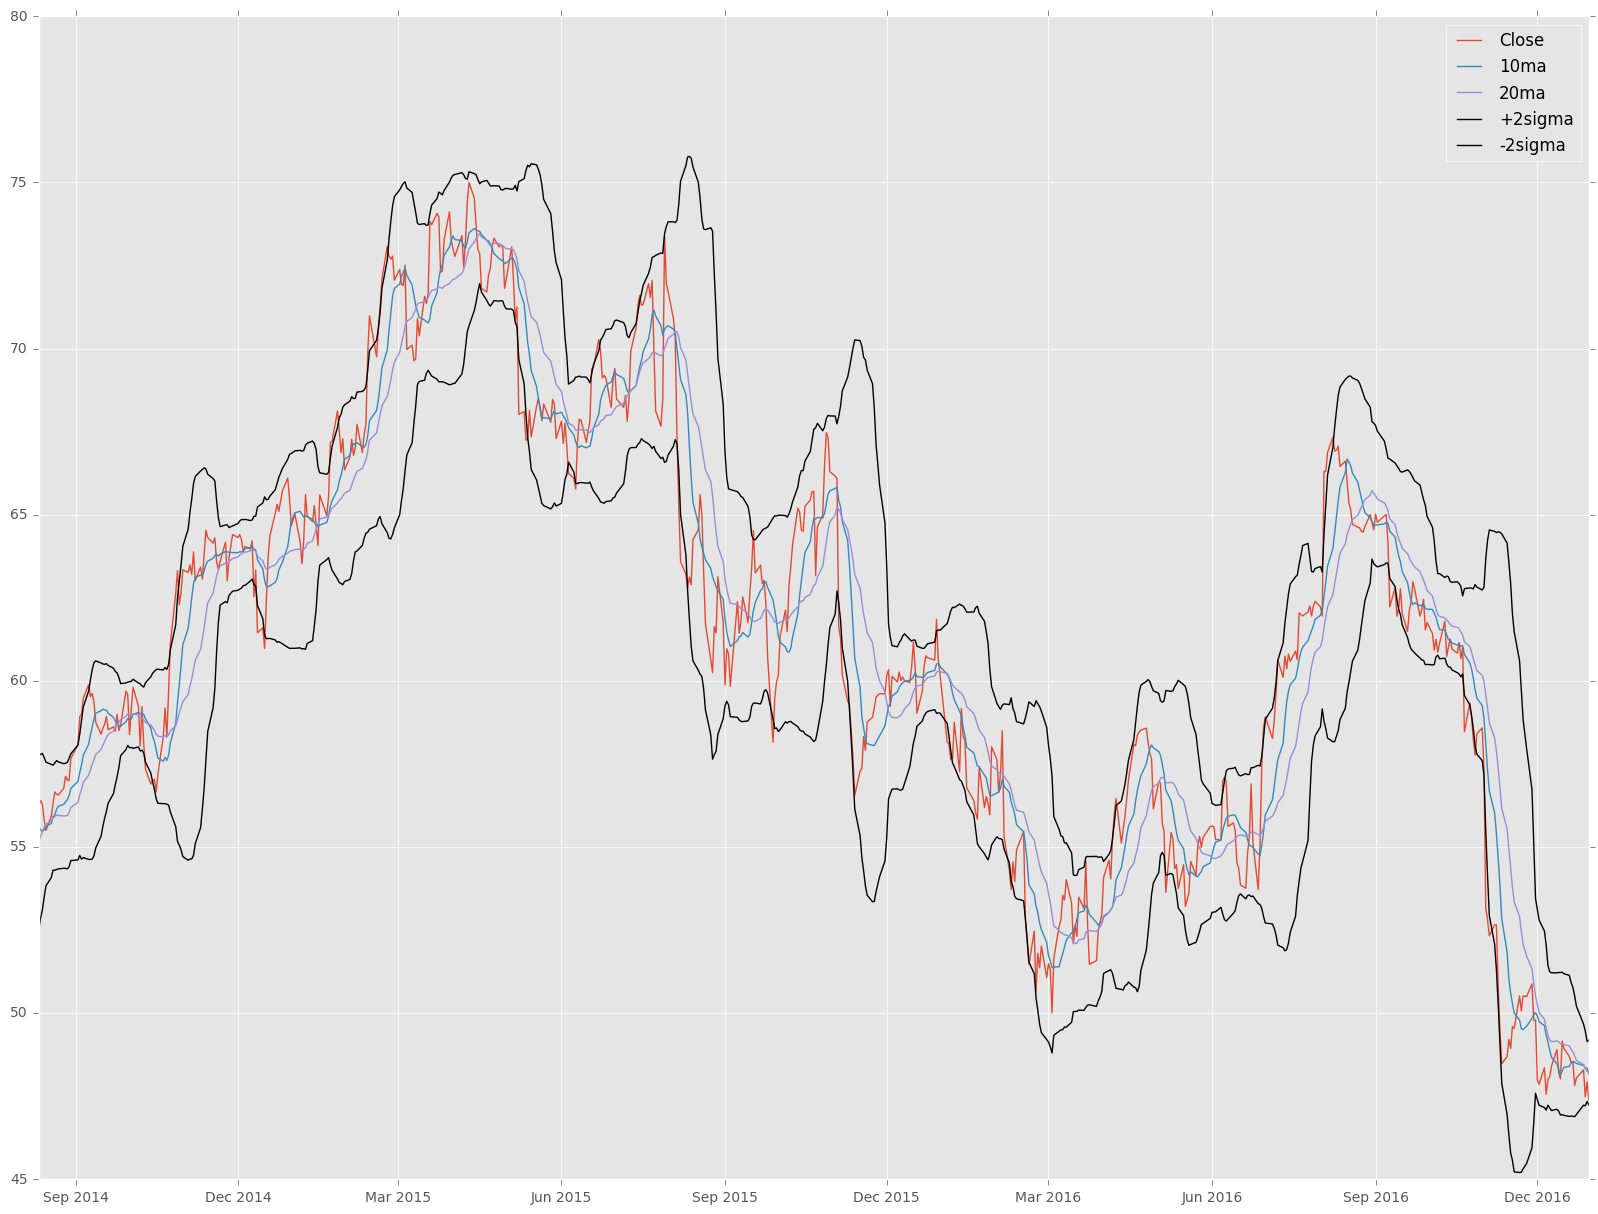

In [92]:
plt.figure(figsize=(20,15))
a_sub=a[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['Close','10ma','20ma','+2sigma','-2sigma']]
plt.plot(a_sub[['Close','10ma','20ma']])
plt.plot(a_sub[['+2sigma','-2sigma']],color='black')

plt.legend(a_sub)


In [93]:
a.head(5)

,Open,High,Low,Close,Adj Close,Volume,10ma,20ma,+2sigma,-2sigma,Vol_mavg,Daily_Return,Daily_Return_ma
Date,,,,,,,,,,,,,
2014-08-11,55.910000,56.400002,55.480000,56.230000,56.230000,1709700,55.580000,55.1470,57.775621,52.518379,2290445.0,1.060390,-0.129237
2014-08-12,56.090000,56.419998,56.080002,56.389999,56.389999,1464500,55.512000,55.3215,57.779906,52.863094,2161990.0,0.284544,-0.106042
2014-08-13,56.459999,56.820000,56.200001,56.279999,56.279999,1591600,55.457000,55.4550,57.809879,53.100121,2090730.0,-0.195070,-0.083495
2014-08-14,56.299999,56.540001,55.450001,55.799999,55.799999,1897600,55.516999,55.5860,57.685679,53.486321,2077315.0,-0.852878,0.118037
2014-08-15,56.189999,56.189999,54.970001,55.490002,55.490002,2016900,55.622000,55.6850,57.545645,53.824354,2087920.0,-0.555550,0.200164


In [94]:
# a method to go row by row to calculate difference of Close and the Moving Average (ma)

#The Trade Entry Parameters. CLOSE ABOVE 10 MOVING AVERAGE.
the_date=[]
the_close=[]
the_entry_High=[]
the_entry_Low=[]
the_entry_Vol=[]
the_Vol_mavg=[]
the_sma=[]
the_20sma=[]
the_plus_sigma=[]
the_minus_sigma=[]
limit_order=[]
the_target=[]
the_stop_loss=[]
the_DR=[]
the_DR_MA=[]

#The Trade Exit Parameters_________________________
the_ma_exit=[]
the_20sma_exit=[]
the_exit_date=[]
the_duration=[]
the_exit_close=[]
the_exit_High=[]
the_exit_Low=[]
the_exit_Vol=[]
the_plus_sigma_exit=[]
the_minus_sigma_exit=[]


#the_ma_pct=[]
the_result=[]

target_pct=.05
stop_loss_pct=.05

n=0
p1=0
p2=0

upcounter=0

L=len(a.index)

my_date=np.empty([0])
closer=np.empty([0])

ma_exit=np.empty([0])


for x in range(L):
    
    ma_check=a['Close'].iloc[x]-a['10ma'].iloc[x]
    #ma_check_previous= a['Close'].iloc[x-1]-a['10ma'].iloc[x-1]
    
    if (x==0):
        #continue
        ma_check_previous=a['Close'].iloc[0]-a['10ma'].iloc[0]
    else:
        ma_check_previous= a['Close'].iloc[x-1]-a['10ma'].iloc[x-1]
        
        
    
    #print(x,ma_check,ma_check_previous)
    
    #moving average uptrend transition--------------------------------------------------
    if (ma_check>0) and (ma_check_previous<0):
        
        #if x==0:
            #continue
        
        the_date.append(a.index[x])
        the_close.append(a.Close.iloc[x])
        
        the_entry_High.append(a.High.iloc[x])
        the_entry_Low.append(a.Low.iloc[x])
        the_entry_Vol.append(a.Volume.iloc[x])
        the_20sma.append(a['20ma'].iloc[x])
        the_plus_sigma.append(a['+2sigma'].iloc[x])
        the_minus_sigma.append(a['-2sigma'].iloc[x])
        the_Vol_mavg.append(a['Vol_mavg'].iloc[x])
        
        the_sma.append(a['10ma'].iloc[x])
        the_target.append((a.Close.iloc[x])+(a.Close.iloc[x]*target_pct))
        limit_order.append(a.Close.iloc[x])
        the_stop_loss.append((a.Close.iloc[x])-(a.Close.iloc[x]*stop_loss_pct))
        
        the_DR.append(a.Daily_Return.iloc[x])
        the_DR_MA.append(a.Daily_Return_ma.iloc[x])
        
        my_date=np.append(my_date,a.index[x])
        closer=np.append(closer,a.Close.iloc[x])
        
          
        the_limit_order=limit_order[n]    
        the_current_target=the_target[n]
        the_uptrend_date=the_date[n]       # the n variable locks in the current uptrend date
        
        #n=n+1
        print (x,'uptrend:',a.index[x],a.Close.iloc[x],a['10ma'].iloc[x]) 
        
        p1=len(the_date)
        
        print (p1)
        upcounter=upcounter+1
            
    #moving average downtrend transition---------------------------------------------------------    
    if (ma_check<0) and (ma_check_previous>0) and upcounter!=0:
        
        #if x==0:
            #continue
        #if (the_uptrend_date>a.index[x]):
            #continue
            
        the_ma_exit.append(a['10ma'].iloc[x])
        the_exit_date.append(a.index[x])
        the_exit_close.append(a.Close.iloc[x])
        
        the_exit_High.append(a['High'].iloc[x])
        the_exit_Low.append(a.Low.iloc[x])
        the_exit_Vol.append(a.Volume.iloc[x])
        
        the_20sma_exit.append(a['20ma'].iloc[x])
        the_plus_sigma_exit.append(a['+2sigma'].iloc[x])
        the_minus_sigma_exit.append(a['-2sigma'].iloc[x])
        
        the_result.append(a['10ma'].iloc[x]-the_limit_order)
        
        
        the_duration.append(the_exit_date[n]-the_uptrend_date)
        
        #ma_exit=np.append(ma_exit,a['10ma'].iloc[x])
        
        print(len(the_ma_exit))
        
        p2=len(the_ma_exit)
        
        print (x,'downtrend:',a.index[x])   
        
        n=n+1   # the n variable is incremented when the uptrend is over (downtrend below the moving avg)
    
    #Above the moving average.------------------------------------------------------------------
    if (ma_check>0) and (ma_check_previous>0)and upcounter!=0:
        
        if(the_current_target>a.High.iloc[x]):
            #print('Gain',a.index[x])
            pass
            
    #if  (p1==15) and (p2==15):
       # break
            
               
       
            
#print(len(the_date))
#print(len(the_close))
#print(len(the_sma))
#print(len(limit_order))
#print(len(the_target))
#print(len(the_stop_loss))
#print(len(the_ma_exit))
#print(len(the_exit_date))            
#print(the_exit_date)   
#print(the_uptrend_date)
#print(date_set)
            

##NOTE: (11/4/17)Using the code to keep the number of upstream trends and downstream trends equal in a given window._
#This eliminates the error when converting to a dataframe    
##NOTE: (11/4/17)I could replace the list with appending numpy arrays and then convert then to a dataframe thru various methods.


5 uptrend: 2014-08-18 00:00:00 55.919998 55.6999996
1
1
23 downtrend: 2014-09-12 00:00:00
31 uptrend: 2014-09-24 00:00:00 58.990002 58.7270001
2
2
32 downtrend: 2014-09-25 00:00:00
33 uptrend: 2014-09-26 00:00:00 58.66 58.632
3
3
36 downtrend: 2014-10-01 00:00:00
37 uptrend: 2014-10-02 00:00:00 59.139999 58.8540002
4
4
40 downtrend: 2014-10-07 00:00:00
41 uptrend: 2014-10-08 00:00:00 59.220001 59.0240002
5
5
42 downtrend: 2014-10-09 00:00:00
49 uptrend: 2014-10-20 00:00:00 58.32 57.5760004
6
6
63 downtrend: 2014-11-07 00:00:00
64 uptrend: 2014-11-10 00:00:00 63.419998 63.184
7
7
65 downtrend: 2014-11-11 00:00:00
66 uptrend: 2014-11-12 00:00:00 63.82 63.3119999
8
8
71 downtrend: 2014-11-19 00:00:00
74 uptrend: 2014-11-24 00:00:00 64.169998 63.8849994
9
9
75 downtrend: 2014-11-25 00:00:00
77 uptrend: 2014-11-28 00:00:00 64.400002 63.8549995
10
10
81 downtrend: 2014-12-04 00:00:00
82 uptrend: 2014-12-05 00:00:00 64.040001 63.9749997
11
11
83 downtrend: 2014-12-08 00:00:00
84 uptrend: 2014

df=pd.DataFrame(data=[[my_date],[closer]],columns=['Date','Close'])
df

In [95]:
a.Volume.iloc[x]

1780200

In [96]:
the_df={'Close':the_close,'10ma_IN':the_sma,'Date':the_date,'Target':the_target,'Entry':limit_order,
        'Stop_Loss':the_stop_loss,
        'MA_Exit_Date':the_exit_date,'MA_on_Exit':the_ma_exit,
        'Duration':the_duration,'Close_OUT':the_exit_close,
        'High_OUT':the_exit_High,'Low_OUT':the_exit_Low,
        'Vol_OUT':the_exit_Vol,'GL_on_MA':the_result,'20ma_IN':the_20sma,
        '20ma_OUT':the_20sma_exit,
        'High_IN':the_entry_High,'Low_IN':the_entry_Low,
        'Vol_IN':the_entry_Vol,'+2sigma_IN':the_plus_sigma,'-2sigma_IN':the_minus_sigma,
        '+2sigma_OUT':the_plus_sigma_exit,'-2sigma_OUT':the_minus_sigma_exit,
        'Vol_MA_IN':the_Vol_mavg,'%DR':the_DR,'DR_ma':the_DR_MA}

In [97]:
df=pd.DataFrame(data=the_df,columns=['Date','Close',
                                     '10ma_IN','20ma_IN',
                                     '+2sigma_IN','-2sigma_IN','%DR','DR_ma',
                                     'High_IN','Low_IN','Vol_IN','Vol_MA_IN','Target',
                                     'Entry','Stop_Loss',
                                     'MA_Exit_Date','MA_on_Exit','20ma_OUT',
                                     '+2sigma_OUT','-2sigma_OUT',
                                     'Duration',
                                     'Close_OUT','High_OUT',
                                     'Low_OUT','Vol_OUT',
                                     'GL_on_MA'])

df.assign(MA_Result=lambda df:df.GL_on_MA*2 if df.GL_on_MA>0 else (df.GL_on_MA/df.GL_on_MA))

In [98]:
num_shares=100
#df.assign(GL_MA_Money=lambda df:df.GL_on_MA*num_shares)
df['GL_MA_Money']=(df.GL_on_MA*num_shares)
df['GL_MA_%']=((df.MA_on_Exit-df.Entry)/df.Entry)*100


        

df['GL_Result'].apply(lambda x: 1)
for k in df['GL_MA_Money']:
    if k>0:
        print(k)
        df['GL_Result'].apply(lambda x: 1)
        continue
    else:
        print(k)
        df['GL_Result'].apply(lambda x: 0)
        
        

In [99]:
df.head(25)


,Date,Close,10ma_IN,20ma_IN,+2sigma_IN,-2sigma_IN,%DR,DR_ma,High_IN,Low_IN,...,+2sigma_OUT,-2sigma_OUT,Duration,Close_OUT,High_OUT,Low_OUT,Vol_OUT,GL_on_MA,GL_MA_Money,GL_MA_%
0,2014-08-18,55.919998,55.700000,55.776500,57.480258,54.072741,0.774907,0.149073,55.950001,55.419998,...,60.595764,54.965237,25 days,58.750000,59.490002,58.490002,2457600,3.101003,310.10027,5.545427
1,2014-09-24,58.990002,58.727000,58.668500,60.233799,57.103201,0.872096,-0.102951,59.200001,58.320000,...,60.102313,57.384688,1 days,58.500000,58.889999,58.250000,2021400,-0.349002,-34.90020,-0.591629
2,2014-09-26,58.660000,58.632000,58.826500,59.912261,57.740740,0.273504,-0.013964,58.689999,57.959999,...,59.970582,57.983418,5 days,58.380001,59.459999,58.310001,1659900,0.172000,17.20001,0.293215
3,2014-10-02,59.139999,58.854000,58.984500,59.980756,57.988244,1.301812,0.042706,59.490002,58.380001,...,59.905711,57.884289,5 days,58.040001,59.130001,58.020000,1281800,-0.138999,-13.89987,-0.235033
4,2014-10-08,59.220001,59.024000,58.875500,59.842219,57.908781,2.033081,0.048883,59.299999,57.790001,...,59.809015,57.816985,1 days,58.110001,59.299999,57.930000,1384500,-0.235001,-23.50007,-0.396827
5,2014-10-20,58.320000,57.576000,58.310500,60.323923,56.297077,1.975872,-0.146799,58.340000,56.880001,...,66.148391,55.092609,18 days,63.009998,63.959999,62.700001,1695900,4.785000,478.50003,8.204733
6,2014-11-10,63.419998,63.184000,60.947000,66.316250,55.577750,0.650690,0.129901,63.439999,62.529999,...,66.356547,56.145453,1 days,63.060001,63.689999,62.779999,961600,-0.260998,-26.09980,-0.411539
7,2014-11-12,63.820000,63.312000,61.590500,66.409194,56.771806,1.205200,0.246195,63.930000,62.660000,...,65.411879,60.890121,7 days,63.570000,64.320000,63.439999,1109400,-0.016000,-1.60003,-0.025071
8,2014-11-24,64.169998,63.884999,63.534500,64.687280,62.381719,0.896226,0.120373,64.199997,63.320000,...,64.692215,62.346784,1 days,63.009998,64.660004,62.959999,2306800,-0.289999,-28.99989,-0.451923
9,2014-11-28,64.400002,63.854999,63.677500,64.658732,62.696267,1.098903,-0.016006,64.730003,63.669998,...,64.846278,62.863721,6 days,63.880001,64.580002,63.580002,605700,-0.494003,-49.40026,-0.767085


In [100]:
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
Date            65 non-null datetime64[ns]
Close           65 non-null float64
10ma_IN         65 non-null float64
20ma_IN         65 non-null float64
+2sigma_IN      65 non-null float64
-2sigma_IN      65 non-null float64
%DR             65 non-null float64
DR_ma           65 non-null float64
High_IN         65 non-null float64
Low_IN          65 non-null float64
Vol_IN          65 non-null int64
Vol_MA_IN       65 non-null float64
Target          65 non-null float64
Entry           65 non-null float64
Stop_Loss       65 non-null float64
MA_Exit_Date    65 non-null datetime64[ns]
MA_on_Exit      65 non-null float64
20ma_OUT        65 non-null float64
+2sigma_OUT     65 non-null float64
-2sigma_OUT     65 non-null float64
Duration        65 non-null timedelta64[ns]
Close_OUT       65 non-null float64
High_OUT        65 non-null float64
Low_OUT         65 non-null float64
Vol_OUT      

In [101]:
g=a

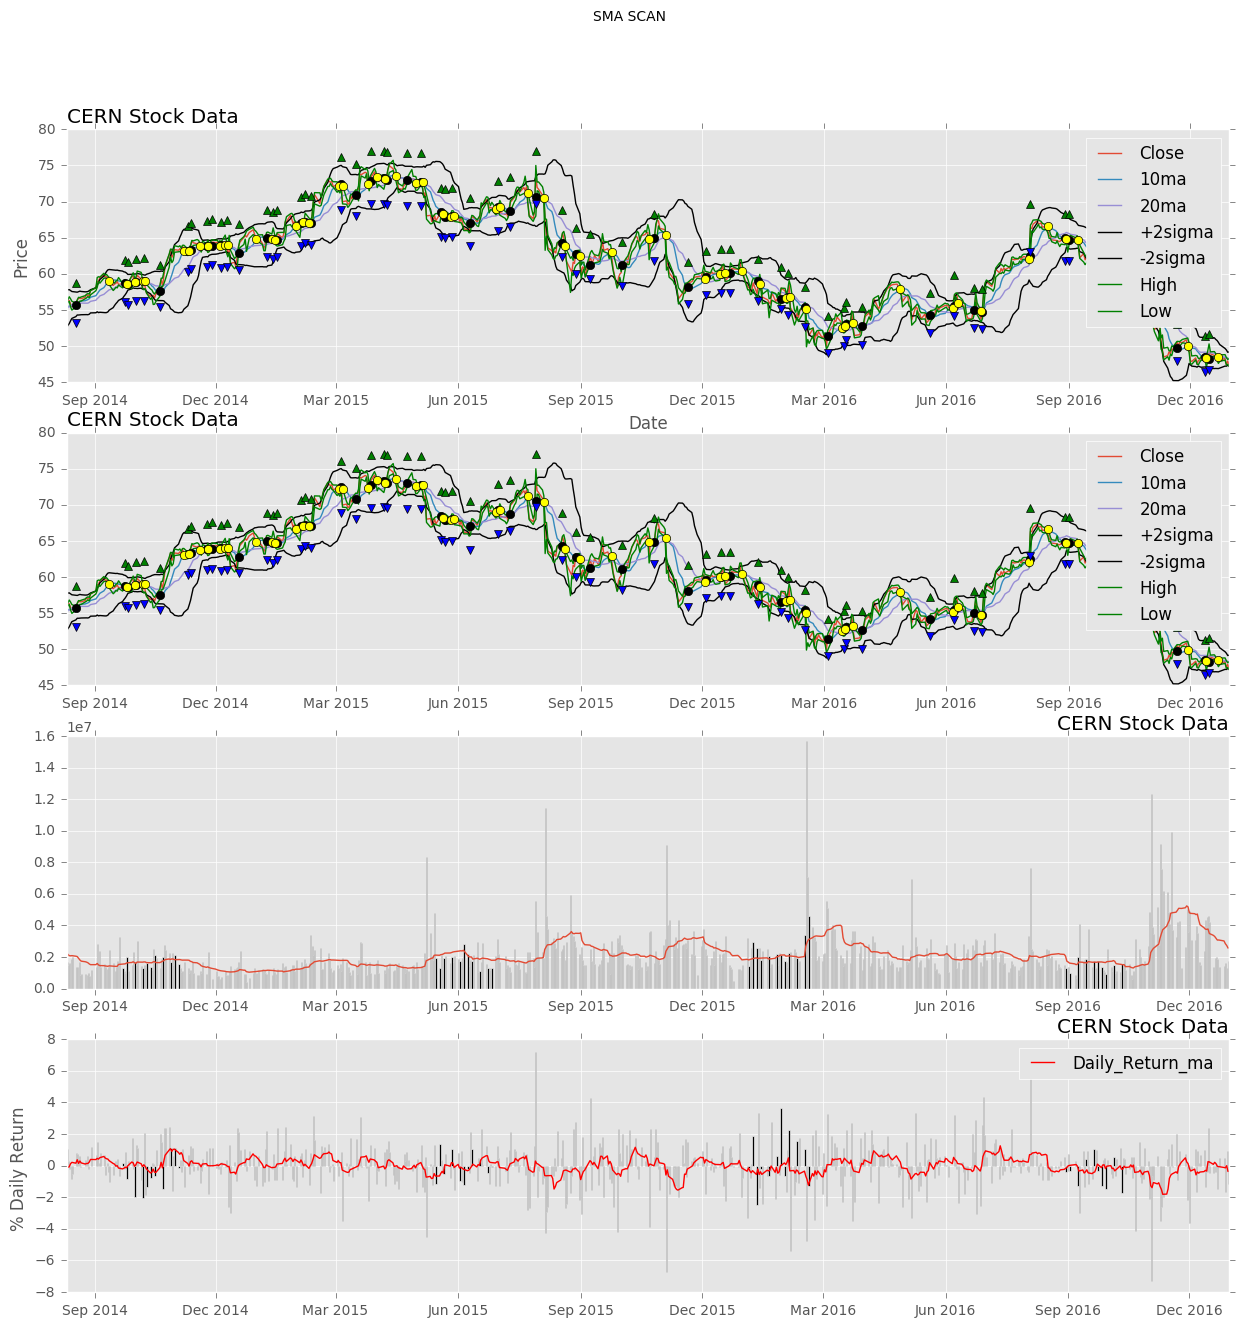

In [102]:
fig=plt.figure(figsize=(15,15))
fig.suptitle('SMA SCAN')
 
ax=fig.add_subplot(411)
ax1=fig.add_subplot(412)
ax2=fig.add_subplot(413)
ax3=fig.add_subplot(414)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
 
ax.set_title(label='{} Stock Data'.format(stock_symbol),loc='left')
ax1.set_title(label='{} Stock Data'.format(stock_symbol),loc='left')
ax2.set_title(label='{} Stock Data'.format(stock_symbol),loc='right')
ax3.set_title(label='{} Stock Data'.format(stock_symbol),loc='right')
 
#ax.text(4,7500,'one point',fontsize=15)
#ax.axis([0,10,0,15000])

ax.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['Close','10ma','20ma']])
ax.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['+2sigma','-2sigma']],color='black')
ax.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['High','Low']],color='g')

ax.plot(df['Date'],df['10ma_IN'],'o',color='black')

ax.plot(df['Date'],df['Target'],'^',color='green')

ax.plot(df['MA_Exit_Date'],df['MA_on_Exit'],'o',color='yellow')

ax.plot(df['Date'],df['Stop_Loss'],'v',color='blue')
ax.legend(g[['Close','10ma','20ma','+2sigma','-2sigma','High','Low']])

#---------------------------------------------------------------------------------

ax1.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['Close','10ma','20ma']])
ax1.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['+2sigma','-2sigma']],color='black')
ax1.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)][['High','Low']],color='g')

ax1.plot(df['Date'],df['10ma_IN'],'o',color='black')

ax1.plot(df['Date'],df['Target'],'^',color='green')

ax1.plot(df['MA_Exit_Date'],df['MA_on_Exit'],'o',color='yellow')

ax1.plot(df['Date'],df['Stop_Loss'],'v',color='blue')

ax1.legend(g[['Close','10ma','20ma','+2sigma','-2sigma','High','Low']])

#plt.xlim('2017-3','2017-4')

#---------------------------------------------------------------------------------
ax2.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)]['Vol_mavg'])
ax2.bar(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)].index,g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)]['Volume'],color='black')

#---------------------------------------------------------------------------------
ax3.set_ylabel('% Daily Return ')
ax3.bar(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)].index,g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)]['Daily_Return'],color='black')
ax3.plot(g[dt.datetime(y1,1,1):dt.datetime(y2,12,31)]['Daily_Return_ma'],color='r')
ax3.legend()


plt.savefig(r'C:\Users\dbowman\Desktop\Python Training\Data Sets\{} Stock Data.pdf'.format(stock_symbol))
#plt.savefig(r'C:\Users\Sharyn\Desktop\Python Programs\Stock_AI_Data\{} Stock Data.pdf'.format(stock_symbol))

In [103]:
df.GL_on_MA.sum()

17.312000499994838

In [104]:
the_GL_amount=df.GL_MA_Money.sum()

In [105]:
df.describe()

,Close,10ma_IN,20ma_IN,+2sigma_IN,-2sigma_IN,%DR,DR_ma,High_IN,Low_IN,Vol_IN,...,+2sigma_OUT,-2sigma_OUT,Duration,Close_OUT,High_OUT,Low_OUT,Vol_OUT,GL_on_MA,GL_MA_Money,GL_MA_%
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,...,65.000000,65.000000,65,65.000000,65.000000,65.000000,6.500000e+01,65.000000,65.000000,65.000000
mean,62.554769,62.051400,62.255169,64.930165,59.580173,1.563403,0.023131,62.824462,61.473385,1.952145e+06,...,65.203624,60.017191,6 days 22:31:23.076923,62.263693,63.324154,61.896000,2.161674e+06,0.266338,26.633847,0.480677
std,6.393794,6.354114,6.132087,6.499466,6.145606,1.331466,0.240408,6.403731,6.320105,1.222061e+06,...,6.587829,5.993665,7 days 10:59:27.665712,6.273845,6.332270,6.384341,2.102369e+06,1.634720,163.472035,2.798786
min,48.889999,48.249000,49.079000,51.204432,45.192780,0.250470,-0.673007,48.919998,48.110001,5.938000e+05,...,50.512024,46.682741,1 days 00:00:00,47.810001,48.509998,47.009998,6.057000e+05,-2.938001,-293.800080,-4.002726
25%,58.660000,58.105000,58.668500,59.980756,55.577750,0.800799,-0.102951,58.689999,57.200001,1.217900e+06,...,60.102313,56.598131,1 days 00:00:00,58.380001,59.459999,58.250000,1.352900e+06,-0.442002,-44.200230,-0.678992
50%,63.130001,62.531001,62.294000,64.983747,60.195494,1.079666,0.040676,63.200001,62.529999,1.515300e+06,...,65.278319,60.321687,4 days 00:00:00,62.529999,63.689999,61.950001,1.696000e+06,-0.241999,-24.199880,-0.392702
75%,67.169998,67.010000,66.296500,69.142097,63.478418,2.033081,0.176756,67.330002,65.790001,2.385400e+06,...,69.118611,63.660487,9 days 00:00:00,66.779999,67.599998,66.459999,2.165700e+06,0.374999,37.499860,0.565609
max,73.400002,73.249001,73.122500,75.399642,71.352530,7.168936,0.688115,75.000000,72.610001,7.635900e+06,...,75.236077,71.704332,35 days 00:00:00,73.000000,74.410004,72.910004,1.569970e+07,7.024999,702.499880,12.754173


In [106]:
upcount=0


num_of_uptrends=len(df['GL_on_MA'])
for k in df['GL_on_MA']:
    if (k>0):
        upcount=upcount+1
        print (k, upcount)
        
        
        
        
pct_success=upcount/num_of_uptrends  

print('{} trade cycles'.format(upcounter),'.Percentage +Gain trades for {} was {:.1%} '.format(stock_symbol,pct_success),' with a net G/L of ${:,.2f}'.format(the_GL_amount ))



3.1010027 1
0.1720001 2
4.7850003 3
1.0639999 4
1.0760036 5
4.7529957 6
0.8050008 7
0.1070021 8
0.3209986 9
1.8280023 10
1.2420022 11
0.6009987 12
3.5219999 13
0.4320021 14
0.5670003 15
0.8270012 16
0.1819984 17
5.2249991 18
0.6409993 19
7.0249988 20
0.3749986 21
65 trade cycles .Percentage +Gain trades for CERN was 32.3%   with a net G/L of $1,731.20


In [107]:
Location=r'C:\Users\dbowman\Desktop\Python Training\Data Sets\10ma_results.csv'
#Location=r'C:\Users\Sharyn\Desktop\Python Programs\Stock_AI_Data\10ma_results.csv'

with open(Location,'a')as csvfile:
    resultswriter=csv.writer(csvfile)
    resultswriter.writerow(['{} trade cycles'.format(upcounter),'.Percentage +Gain trades for {} was {:.1%} '.format(stock_symbol,pct_success),' with a net G/L of ${:,.2f}'.format(the_GL_amount )])
csvfile.close    

<function TextIOWrapper.close>

In [108]:
#2 sigma spread on trade entry.
df['SS_IN']=(df['+2sigma_IN']-df['-2sigma_IN'])

#The High Low spread on trade entry.
df['HLS_IN']=(df['High_IN']-df['Low_IN'])

#trade success status: 1=trade gain   2=trade loss
df['GL_Success']=np.where(df['GL_on_MA']>0,1,0)

#Volume above(1) or below(0) the volume moving average
df['Above_Vol_Ma']=np.where(df['Vol_IN']>df['Vol_MA_IN'],1,0)

#10ma above(1) or below(0) the 20ma on entry
df['10_above_20']=np.where(df['10ma_IN']>df['20ma_IN'],1,0)

#Close above(1) or below(0) the +2sigma on entry
df['Close_above_2s']=np.where(df['Close']>df['+2sigma_IN'],1,0)

#Daily return above(1) the DR moving average or below(1)
df['DR_above_DRma']=np.where(df['%DR']>df['DR_ma'],1,0)

#Daily return moving average above(1)or below(0) zero
df['DR_ma_up']=np.where(df['DR_ma']>0,1,0)


In [109]:
df.head()

,Date,Close,10ma_IN,20ma_IN,+2sigma_IN,-2sigma_IN,%DR,DR_ma,High_IN,Low_IN,...,GL_MA_Money,GL_MA_%,SS_IN,HLS_IN,GL_Success,Above_Vol_Ma,10_above_20,Close_above_2s,DR_above_DRma,DR_ma_up
0,2014-08-18,55.919998,55.700,55.7765,57.480258,54.072741,0.774907,0.149073,55.950001,55.419998,...,310.10027,5.545427,3.407517,0.530003,1,0,0,0,1,1
1,2014-09-24,58.990002,58.727,58.6685,60.233799,57.103201,0.872096,-0.102951,59.200001,58.320000,...,-34.90020,-0.591629,3.130598,0.880001,0,0,1,0,1,0
2,2014-09-26,58.660000,58.632,58.8265,59.912261,57.740740,0.273504,-0.013964,58.689999,57.959999,...,17.20001,0.293215,2.171521,0.730000,1,0,0,0,1,0
3,2014-10-02,59.139999,58.854,58.9845,59.980756,57.988244,1.301812,0.042706,59.490002,58.380001,...,-13.89987,-0.235033,1.992512,1.110001,0,0,0,0,1,1
4,2014-10-08,59.220001,59.024,58.8755,59.842219,57.908781,2.033081,0.048883,59.299999,57.790001,...,-23.50007,-0.396827,1.933438,1.509998,0,0,1,0,1,1


In [110]:
df.to_csv(r'C:\Users\dbowman\Desktop\Python Training\Data Sets\{} dataset.csv'.format(stock_symbol))
#df.to_csv(r'C:\Users\Sharyn\Desktop\Python Programs\Stock_AI_Data\{} dataset.csv'.format(stock_symbol))